In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = np.loadtxt("/content/drive/MyDrive/datasets/pleiGAIA.csv", delimiter=',', skiprows=1, dtype=str)
df = pd.DataFrame(data,columns=['RA', 'DE', 'plx', 'pmRA', 'pmDE', 'Gmag','BP-RP'])

In [4]:
#Clean the DataFrame
df2=df.mask(df == '').dropna().astype(float)
print('Number of Stars Surveyed:', len(df2))
print(df2.shape)

Number of Stars Surveyed: 1423
(1423, 7)


# Reduce dataframe by parallax & proper motion

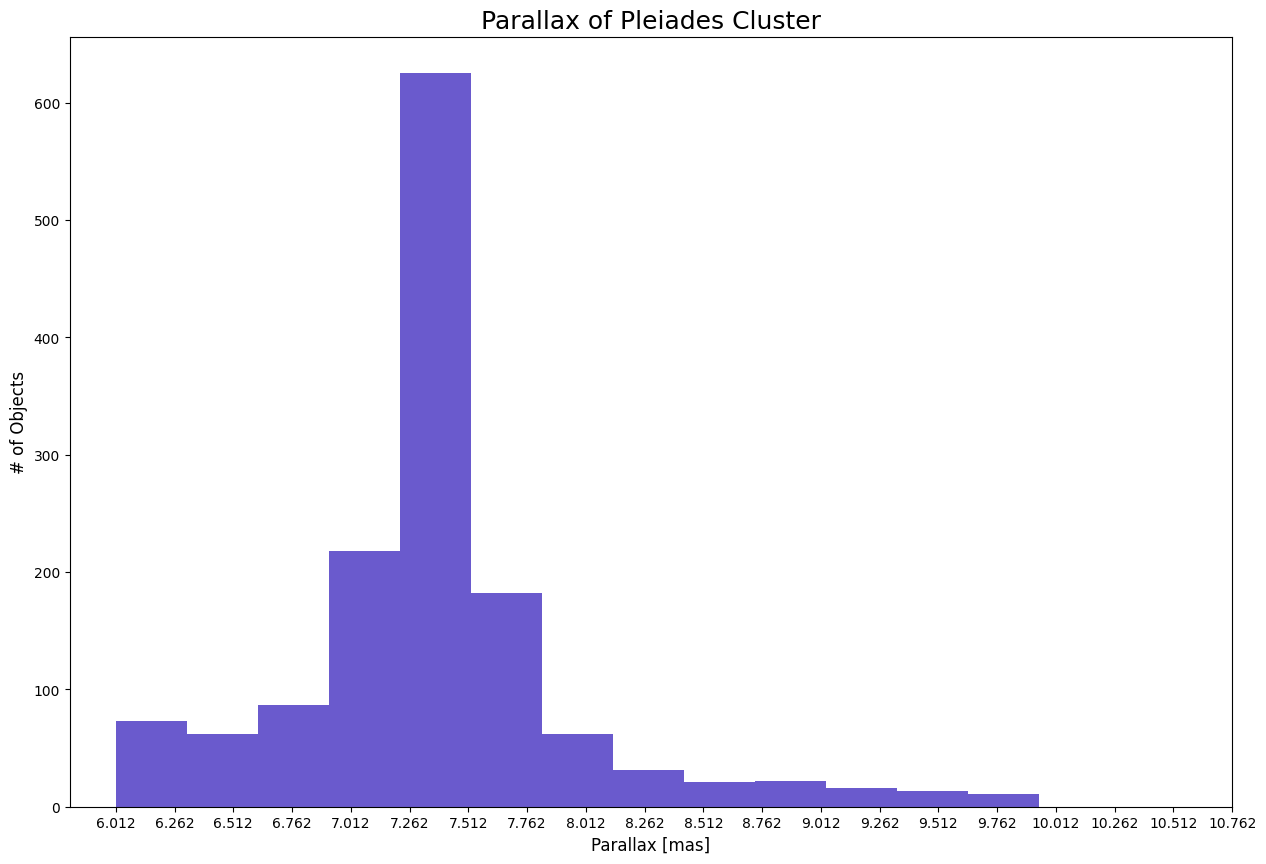

Avg Parallax: 7.367892043880409 [mas]


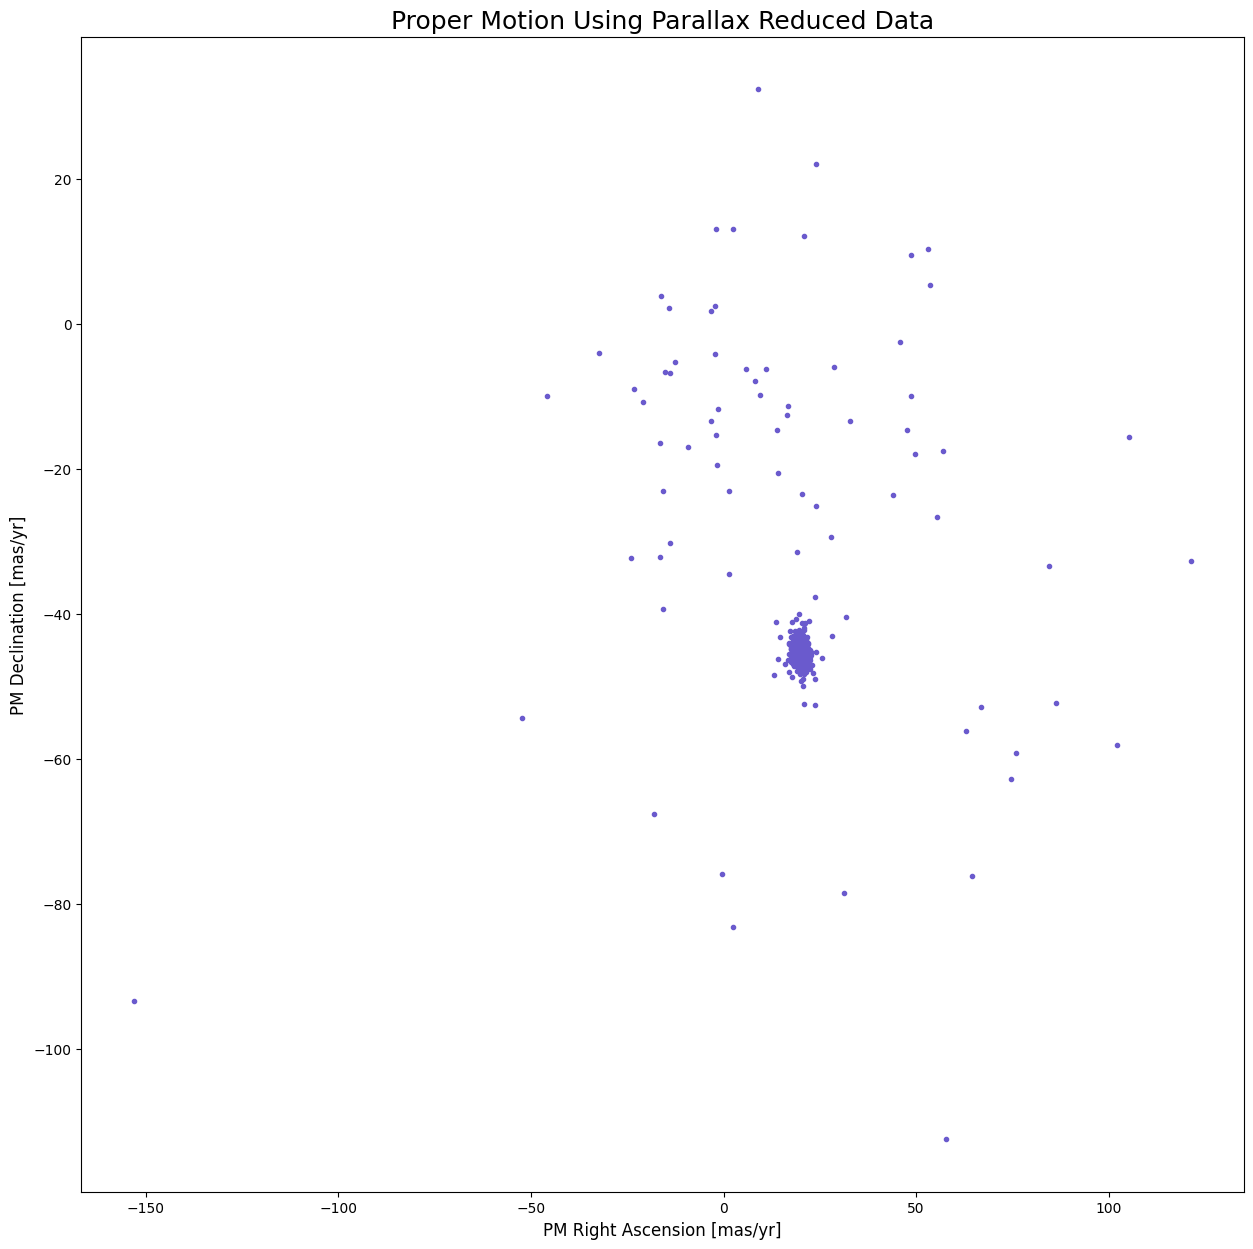

Calculated pmRA: 19.707835216852644 [mas/yr]
Calculated pmDE: -43.69862447703562 [mas/yr]


In [67]:

## visualizing parallax features to reduce dataframe.

plt.figure(figsize=([15,10]))
plt.hist(df2['plx'], bins=13, color='slateblue')
plt.xticks(np.arange(min(df2['plx']), max(df2['plx'])+1, 0.25))
plt.title('Parallax of Pleiades Cluster', size=18)
plt.xlabel('Parallax [mas]', size=12)
plt.ylabel('# of Objects', size=12)
plt.show()

# Parallax Calculation
plx = df2['plx']
print('Avg Parallax:', plx.mean(), '[mas]')

# Reduce Dataframe by parallax
p_reduced_df = df2.drop(df2.loc[~((df2['plx'] <= 7.7) & (df2['plx'] >= 7))].index)


# Visualize Proper Motion features for further reduction
plt.figure(figsize=([15,15]))
plt.scatter(p_reduced_df['pmRA'], p_reduced_df['pmDE'], color='slateblue', marker='.')
plt.title('Proper Motion Using Parallax Reduced Data', size=18)
plt.xlabel('PM Right Ascension [mas/yr]', size=12)
plt.ylabel('PM Declination [mas/yr]', size=12)
plt.show()

# Calculate Proper Motion RA/DEC Values
propmotRA = p_reduced_df['pmRA']
print('Calculated pmRA:', propmotRA.mean(), '[mas/yr]')
propmotDE = p_reduced_df['pmDE']
print('Calculated pmDE:', propmotDE.mean(), '[mas/yr]')

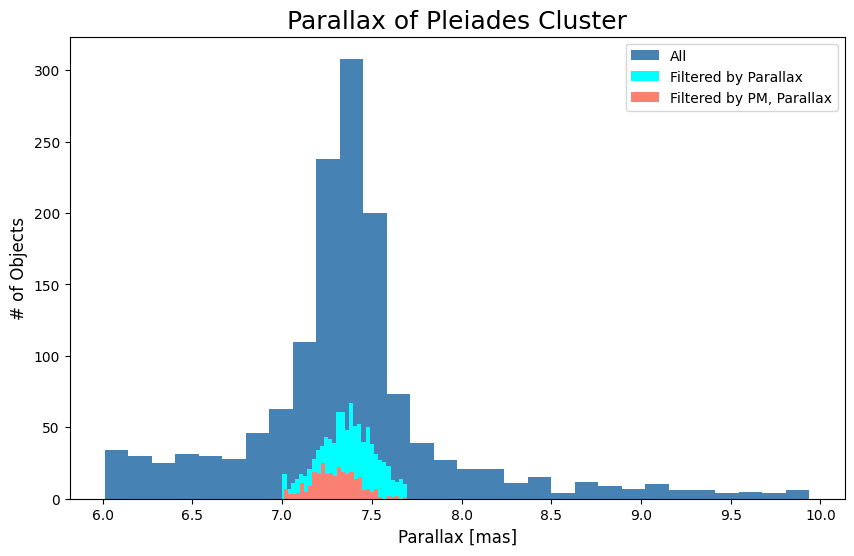

In [121]:
# Reduce Dataframe By Proper Motion

f_df = p_reduced_df.drop(p_reduced_df.loc[~((p_reduced_df['pmRA'] <= 20.5) & (p_reduced_df['pmRA'] >= 18.5) & (p_reduced_df['pmDE'] <= -43) & (p_reduced_df['pmDE'] >= -45.5))].index)

# Parallax Visualization Comparison of Reduced DataFrames
plt.figure(figsize=([10,6]))
plt.hist(df2['plx'], bins=30, color='steelblue', label='All')
plt.hist(p_reduced_df['plx'], bins=30, color='cyan', label='Filtered by Parallax')
plt.hist(f_df['plx'], bins=30, color='salmon', label='Filtered by PM, Parallax')
plt.title('Parallax of Pleiades Cluster', size=18)
plt.xlabel('Parallax [mas]', size=12)
plt.ylabel('# of Objects', size=12)
plt.legend()
# plt.savefig('plx_pleiades_hist.pdf', bbox_inches='tight', pad_inches=0.3)
plt.show()


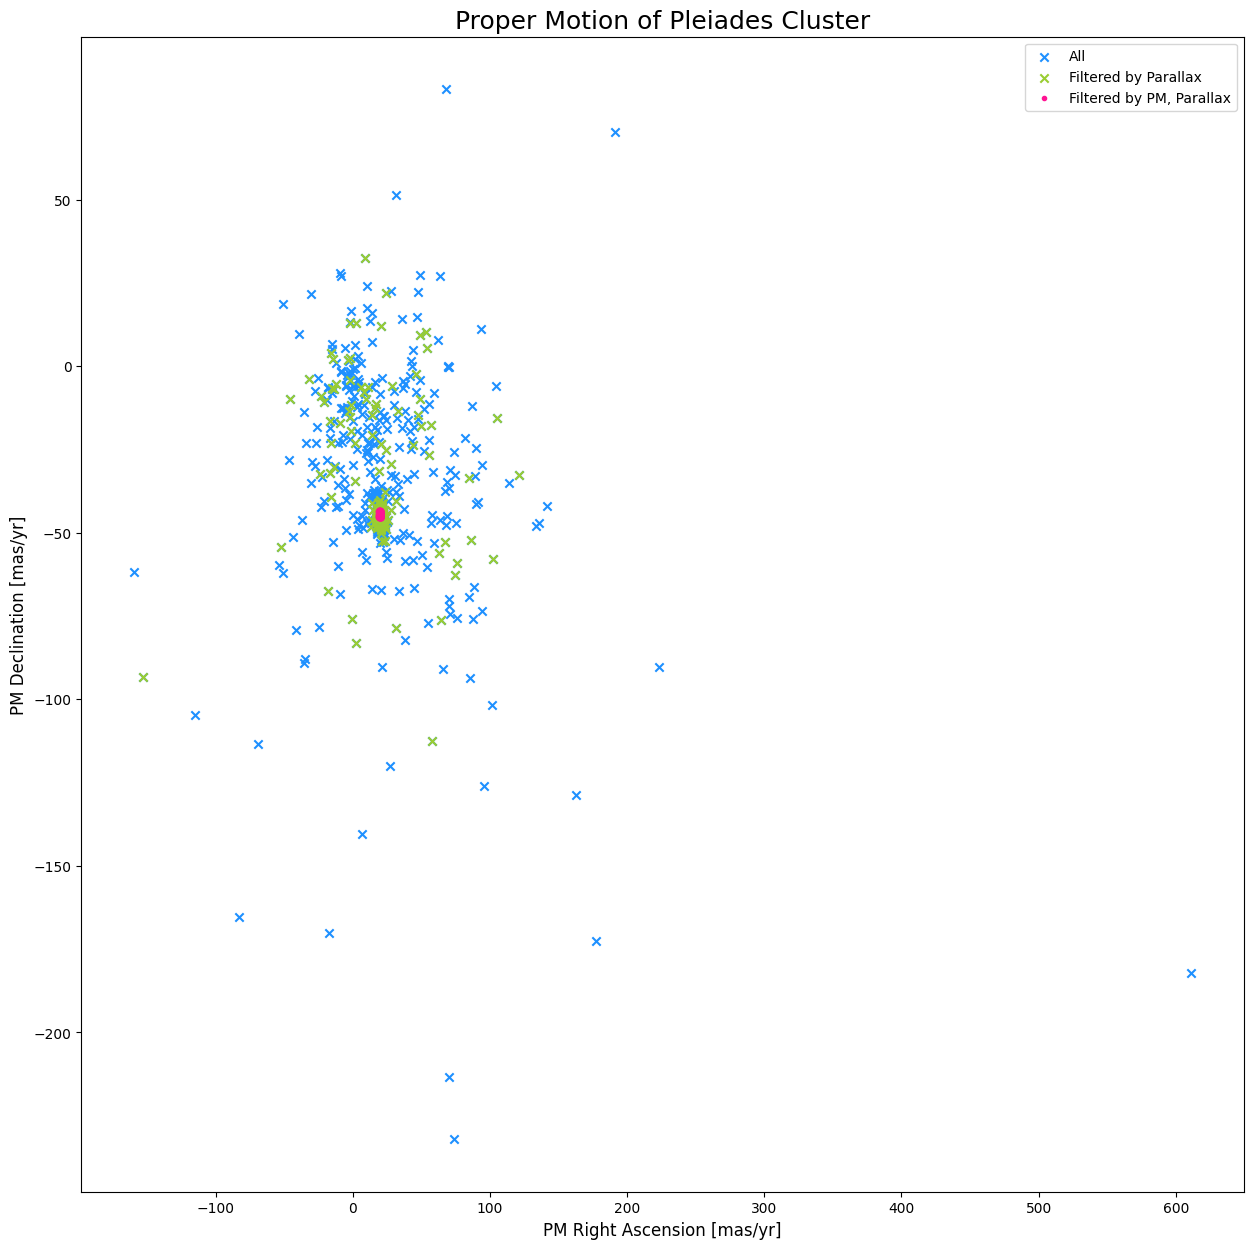

In [122]:
# Proper Motion Visualization Comparison of Reduced DataFrames
plt.figure(figsize=([15,15]))
plt.scatter(df2['pmRA'], df2['pmDE'], color='dodgerblue', marker='x', label='All')
plt.scatter(p_reduced_df['pmRA'], p_reduced_df['pmDE'], color='yellowgreen', marker='x', label='Filtered by Parallax')
plt.scatter(f_df['pmRA'], f_df['pmDE'], color='deeppink', marker='.', label='Filtered by PM, Parallax')
plt.title('Proper Motion of Pleiades Cluster', size=18)
plt.xlabel('PM Right Ascension [mas/yr]', size=12)
plt.ylabel('PM Declination [mas/yr]', size=12)
plt.legend()
plt.show()


In [133]:
# Calculate Distance to Pleiades Cluster
d = (1000 / (f_df['plx'])) # 1000 mas = 1 as #
avgdist = float(d.mean())
print('Calculated Distance to Pleiades:', avgdist, '[pc]')

print('Final Reduced # Stars:', len(f_df))

Calculated Distance to Pleiades: 137.10870193954676 [pc]
Final Reduced # Stars: 292
